In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="dark")

# Comparando Red y Controlador con obstáculo móvil

In [2]:
carNN = pd.read_csv('pose_NN_on_mov.csv', names=['x', 'y', 'yaw', 't'], sep='\t').astype(np.float32)
carVi = pd.read_csv('pose_vis_on_move.csv', names=['x', 'y', 'yaw', 't'], sep='\t').astype(np.float32)
carMa = pd.read_csv('pose_manual_on_mov.csv', names=['x', 'y', 'yaw', 't'], sep='\t').astype(np.float32)

In [3]:
print("Control Vis")
print(carVi.head())
print("Red neuronal")
print(carNN.head())
print("Manual")
print(carMa.head())

Control Vis
      x          y   yaw     t
0  7.71 -23.129999  3.14  0.00
1  7.71 -23.129999  3.14  0.00
2  7.71 -23.129999  3.14  0.00
3  7.71 -23.129999  3.14  0.00
4  7.71 -23.129999  3.14  0.01
Red neuronal
      x          y   yaw     t
0  7.71 -23.129999  3.14  7.59
1  7.71 -23.129999  3.14  7.59
2  7.71 -23.129999  3.14  7.60
3  7.71 -23.129999  3.14  7.60
4  7.71 -23.129999  3.14  7.60
Manual
      x          y   yaw     t
0  7.71 -23.129999 -3.14  0.00
1  7.71 -23.129999 -3.14  0.00
2  7.71 -23.129999 -3.14  0.00
3  7.71 -23.129999 -3.14  0.00
4  7.71 -23.129999 -3.14  0.01


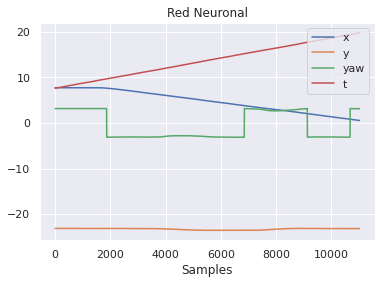

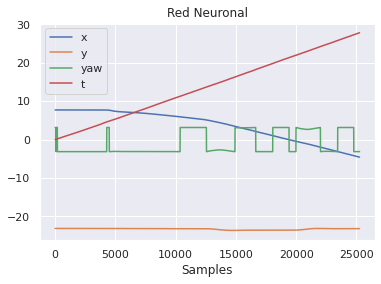

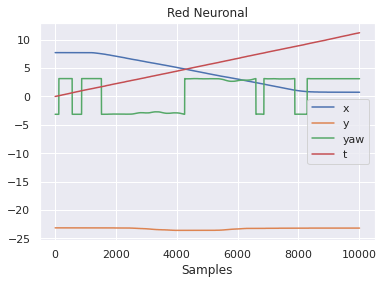

In [4]:
carNN.plot().grid(True)
plt.title('Red Neuronal')
plt.xlabel('Samples')

carVi.plot().grid(True)
plt.title('Red Neuronal')
plt.xlabel('Samples')

carMa.plot().grid(True)
plt.title('Red Neuronal')
plt.xlabel('Samples')

plt.show()

In [96]:
# Yaw vs tiempo en carro sin NN
#plt.plot(carVi['t'], carVi['yaw'])

# Car position
#plt.plot(carVi['x'], carVi['y'])
#plt.plot(carVi['t'], carVi['yaw'])


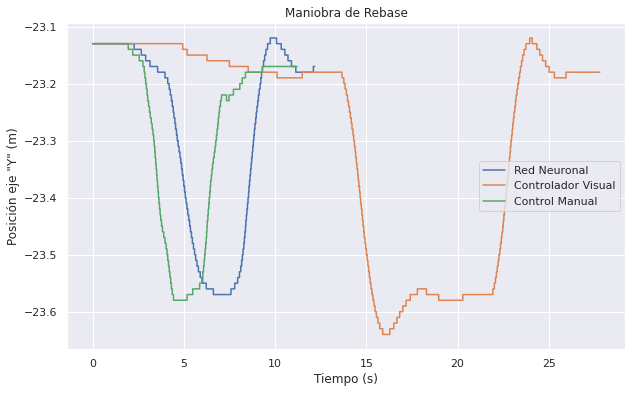

In [4]:
# Yaw vs tiempo en carro con NN
#plt.plot(carNN['t'], carNN['yaw'])

# Car pos
#plt.plot(carNN['x'], carNN['y'])
#plt.plot(carNN['t']-7.59, carNN['yaw'])
plt.figure(figsize=[10,6])
plt.plot(carNN['t']-7.59, carNN['y'], label='Red Neuronal')
plt.plot(carVi['t'], carVi['y'], label='Controlador Visual')
plt.plot(carMa['t'], carMa['y'],  label='Control Manual')
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición eje "Y" (m)')
plt.legend(loc = "best")
plt.title('Maniobra de Rebase')
plt.show()


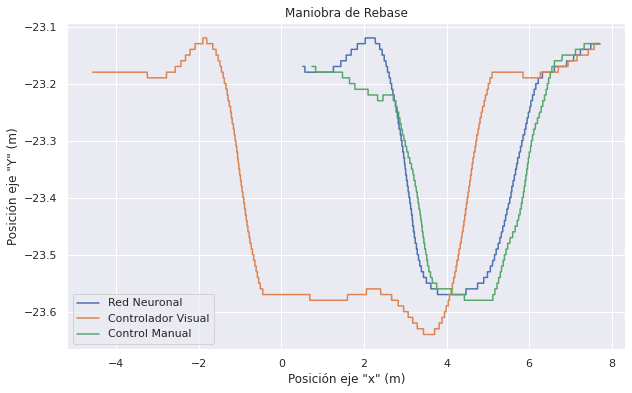

In [8]:
plt.figure(figsize=[10,6])
plt.plot(carNN['x'], carNN['y'], label='Red Neuronal')
plt.plot(carVi['x'], carVi['y'], label='Controlador Visual')
plt.plot(carMa['x'], carMa['y'],  label='Control Manual')
plt.grid(True)
plt.xlabel('Posición eje "x" (m)')
plt.ylabel('Posición eje "Y" (m)')
plt.legend(loc = "best")
plt.title('Maniobra de Rebase')
plt.show()


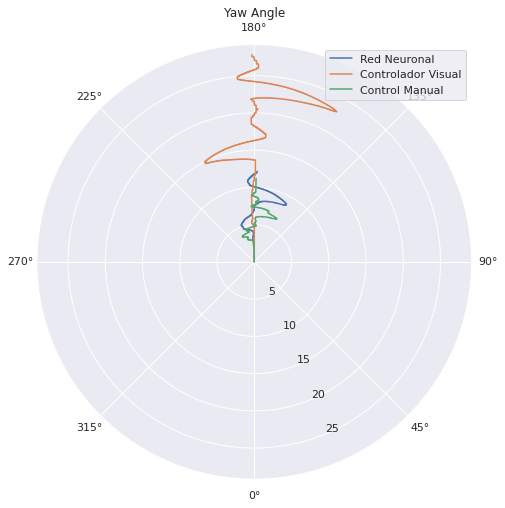

In [53]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
fig.set_figheight(8)
fig.set_figwidth(8)
ax.plot(carNN['yaw'], carNN['t']-7.59, label = "Red Neuronal")
ax.plot(carVi['yaw'], carVi['t'], label = "Controlador Visual")
ax.plot(carMa['yaw'], carMa['t'], label = "Control Manual")
ax.set_theta_zero_location("S")
ax.legend()
ax.set_title('Yaw Angle')
plt.show()

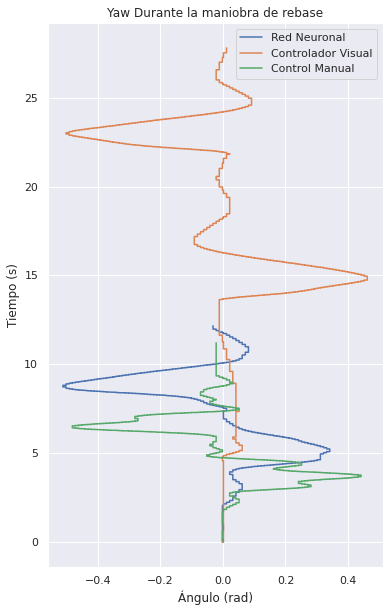

In [54]:
angs = (carVi['yaw'].copy())
c = 0
for ang in angs:
    if ang < 0:
        angs[c] = ang + 3.1416
    else:
        angs[c] = ang - 3.1416
    c += 1

angs2 = (carNN['yaw'].copy())
c = 0
for ang in angs2:
    if ang < 0:
        angs2[c] = ang + 3.1416
    else:
        angs2[c] = ang - 3.1416
    c += 1

angs3 = (carMa['yaw'].copy())
c = 0
for ang in angs3:
    if ang < 0:
        angs3[c] = ang + 3.1416
    else:
        angs3[c] = ang - 3.1416
    c += 1
        

#fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
plt.figure(figsize=[6,10])
plt.plot(angs2, carNN['t']-7.59, label = "Red Neuronal")
plt.plot(angs, carVi['t'], label = "Controlador Visual")
plt.plot(angs3, carMa['t'], label = "Control Manual")
plt.grid(True)
plt.xlabel('Ángulo (rad)')
plt.ylabel('Tiempo (s)')
plt.legend(loc = "best")
plt.title('Yaw Durante la maniobra de rebase')
plt.show()

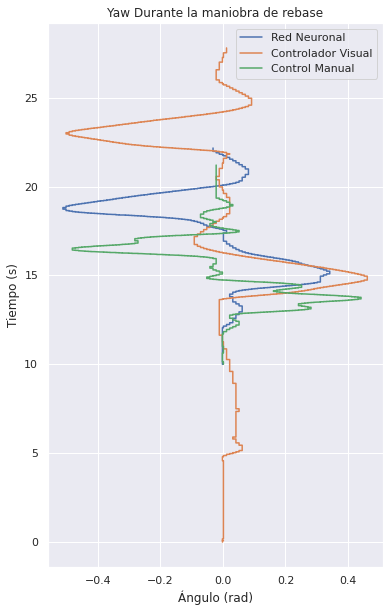

In [55]:
plt.figure(figsize=[6,10])
plt.plot(angs2, carNN['t']-7.59+10, label = "Red Neuronal")
plt.plot(angs, carVi['t'], label = "Controlador Visual")
plt.plot(angs3, carMa['t']+10, label = "Control Manual")
plt.grid(True)
plt.xlabel('Ángulo (rad)')
plt.ylabel('Tiempo (s)')
plt.legend(loc = "best")
plt.title('Yaw Durante la maniobra de rebase')
plt.show()

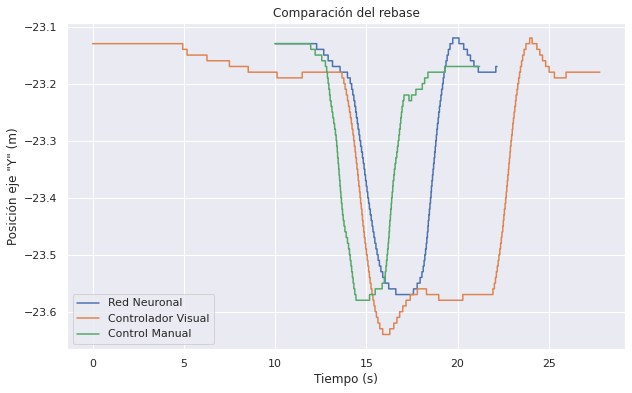

In [59]:
plt.figure(figsize=[10,6])
plt.plot(carNN['t']-7.59+10, carNN['y'], label = "Red Neuronal")
plt.plot(carVi['t'], carVi['y'], label = "Controlador Visual")
plt.plot(carMa['t'] + 10, carMa['y'], label = "Control Manual")
plt.grid(True)
plt.ylabel('Posición eje "Y" (m)')
plt.xlabel('Tiempo (s)')
plt.legend(loc = "best")
plt.title('Comparación del rebase')
plt.show()


# Comparando red contra controlador en obstáculos inmóviles

In [25]:
carNN = pd.read_csv('Pose NN on static cars.csv', names=['x', 'y', 'yaw', 't'], sep='\t').astype(np.float32)
#carVi = pd.read_csv('pose_vis_on_move.csv', names=['x', 'y', 'yaw', 't'], sep='\t').astype(np.float32)

<AxesSubplot:>

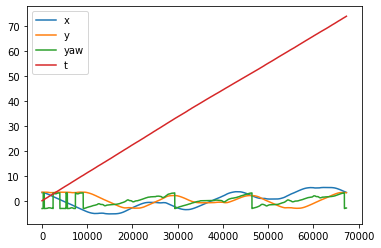

In [26]:
carNN.plot()
#carVi.plot()

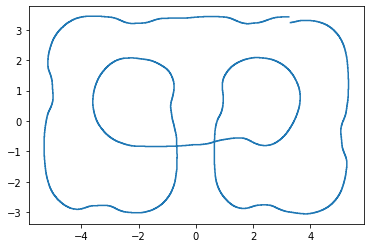

In [27]:
plt.plot(carNN['x'], carNN['y'])